In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('train.csv', dtype={'id':'int', 'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])

In [3]:
(df.memory_usage() / (1024 * 1024)).sum()

29.573829650878906

In [4]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1150000.0


In [5]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

Text(0, 0.5, 'Cantidad publicaciones')

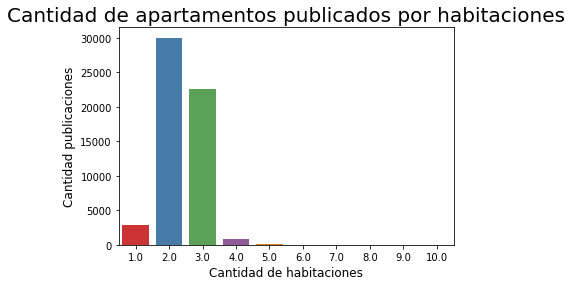

In [37]:
df_cant_hab_apartamentos = df[df.tipodepropiedad == "Apartamento"].groupby(df.habitaciones).size()
grafico_habitaciones_apartamento = sns.barplot(x=df_cant_hab_apartamentos.index,y=df_cant_hab_apartamentos.values,orient='v',palette="Set1",order = df_cant_hab_apartamentos.index)
grafico_habitaciones_apartamento.set_title("Cantidad de apartamentos publicados por habitaciones",fontsize=20)
grafico_habitaciones_apartamento.set_xlabel("Cantidad de habitaciones",fontsize=12)
grafico_habitaciones_apartamento.set_ylabel("Cantidad publicaciones",fontsize=12)

Text(0, 0.5, 'Cantidad publicaciones')

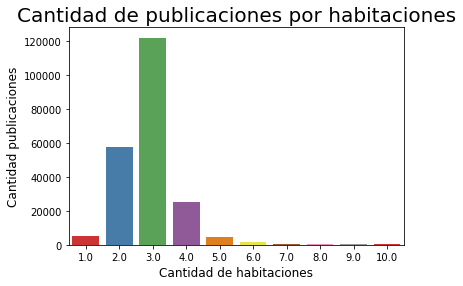

In [38]:
df_cant_habitaciones = df.groupby(df.habitaciones).size()
grafico_habitaciones_publicacion = sns.barplot(x=df_cant_habitaciones.index,y=df_cant_habitaciones.values,orient='v',palette="Set1",order = df_cant_habitaciones.index)
grafico_habitaciones_publicacion.set_title("Cantidad de publicaciones por habitaciones",fontsize=20)
grafico_habitaciones_publicacion.set_xlabel("Cantidad de habitaciones",fontsize=12)
grafico_habitaciones_publicacion.set_ylabel("Cantidad publicaciones",fontsize=12)

Text(0, 0.5, 'Cantidad publicaciones')

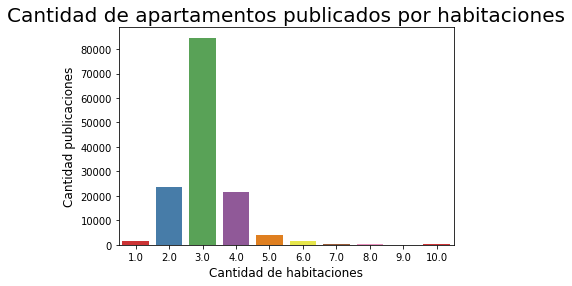

In [40]:
df_cant_hab_casas = df[df.tipodepropiedad == "Casa"].groupby(df.habitaciones).size()
grafico_habitaciones_casas = sns.barplot(x=df_cant_hab_casas.index,y=df_cant_hab_casas.values,orient='v',palette="Set1",order = df_cant_hab_casas.index)
grafico_habitaciones_casas.set_title("Cantidad de apartamentos publicados por habitaciones",fontsize=20)
grafico_habitaciones_casas.set_xlabel("Cantidad de habitaciones",fontsize=12)
grafico_habitaciones_casas.set_ylabel("Cantidad publicaciones",fontsize=12)